In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import os
import glob
import string
import random
import json
from typing import Optional
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from collections import Counter

In [82]:
def plot_network(N,layout):


    colors = ["red", "coral", "lightgrey", "lightgreen", "green"]
    stage_colors=['paleturquoise','lightskyblue','royalblue','blue']
    rewards = np.array([-100, -20, 0, 20, 140])
    

    #----- first reconvert to networkx format-----------
    G=nx.DiGraph()
    for i in N['nodes']:
        G.add_node(i['node_num'],level=i['level'])
    for i in N['edges']:
        G.add_edge(i['source_num'],
                   i['target_num'], 
                   reward=i['reward'],
                   color=colors[np.where(rewards==i['reward'])[0][0]])   

    for n in nx.nodes(G):
        print(f'node {n}')
    #----- get positions of nodes depending on layout -----
    if layout=='circular':
        pos = nx.circular_layout(G,scale=2,center=np.array([0,0]))
    elif layout=='spring':
        pos = nx.spring_layout(G)
    elif layout=='multipartite':
        pos = nx.multipartite_layout(G, subset_key="level")

    pos = list(pos.values())
    #random.shuffle(pos)
    pos = {
        n: p for n, p in enumerate(pos)
    }
    print(pos)
    
    edges = G.edges()
    #edge_colors = [G[u][v]['color'] for u,v in edges]
    #labeldict={n: f"Node {n} / Level {d['stage']}" for n, d in G.nodes(data=True)}
    labeldict={n: f"{n}" for n, d in G.nodes(data=True)}
    

    f = plt.figure(1,figsize=(10,10))
    ax = f.add_subplot(1,1,1)
    # level legend
    leg1 = ax.legend([Line2D([0], [0], marker='o', color=stage_colors[l],markerfacecolor=stage_colors[l], markersize=15) for l in range(4)],
              [f'Level {l}' for l in range(4)],
              loc=1)
    # reward legend
    leg2 = ax.legend([Line2D([0], [0], color=colors[r], lw=3) for r in range(len(rewards))],
              [f'{rewards[r]}' for r in range(len(rewards))],
              loc=8,mode='expand',ncol=len(rewards))
    ax.add_artist(leg1)

    nx.draw_networkx_nodes(G,
                            pos,
                            node_color = [stage_colors[d['level']] for n, d in G.nodes(data=True)],
                            node_size=200)

    for edge in G.edges(data=True):
        print(edge)
        if layout=='multipartite' and edge[0]<5 and edge[1]<5:
            style=f'arc3,rad=0.3'
        else:
            style = f'arc3,rad=0.1'
        nx.draw_networkx_edges(G, pos, edgelist=[(edge[0],edge[1])], arrowstyle= '->', edge_color=edge[2]['color'], connectionstyle=style)

    plt.show()


In [2]:
# open networks file
data_dir = '../../data/rawdata'
with open(os.path.join(data_dir,'test_viz.json')) as json_file:
    test = json.load(json_file)

In [3]:
test

[{'network_id': 'd1c7f6dd1c5504b313482f42d2e8dfd0',
  'nodes': [{'node_num': 0,
    'display_name': 'aa',
    'node_size': 3,
    'level': 0,
    'x': 100.0,
    'y': -1.4702742047251474e-06},
   {'node_num': 1,
    'display_name': 'ba',
    'node_size': 3,
    'level': 0,
    'x': 80.90170037208972,
    'y': -58.7785255187306},
   {'node_num': 2,
    'display_name': 'ca',
    'node_size': 3,
    'level': 0,
    'x': 30.901697689880734,
    'y': -95.10565490463628},
   {'node_num': 3,
    'display_name': 'da',
    'node_size': 3,
    'level': 0,
    'x': -30.901702458252295,
    'y': -95.10564894417183},
   {'node_num': 4,
    'display_name': 'ea',
    'node_size': 3,
    'level': 0,
    'x': -80.90169917999684,
    'y': -58.7785255187306},
   {'node_num': 5,
    'display_name': 'fa',
    'node_size': 3,
    'level': 1,
    'x': -99.9999988079071,
    'y': 7.272003400514403e-06},
   {'node_num': 6,
    'display_name': 'ga',
    'node_size': 3,
    'level': 1,
    'x': -80.9016932195324

## Circular layout

node 0
node 1
node 2
node 3
node 4
node 5
node 6
node 7
node 8
node 9
{0: array([2.00000000e+00, 2.94054841e-08]), 1: array([1.61803401, 1.17557051]), 2: array([0.61803395, 1.9021131 ]), 3: array([-0.61803405,  1.90211298]), 4: array([-1.61803398,  1.17557051]), 5: array([-1.99999998e+00, -1.45440068e-07]), 6: array([-1.61803386, -1.17557057]), 7: array([-0.61803423, -1.90211292]), 8: array([ 0.61803425, -1.90211292]), 9: array([ 1.61803389, -1.17557057])}
(0, 2, {'reward': -20, 'color': 'coral'})
(0, 5, {'reward': -100, 'color': 'red'})
(1, 4, {'reward': 20, 'color': 'lightgreen'})
(1, 0, {'reward': 20, 'color': 'lightgreen'})
(2, 3, {'reward': -20, 'color': 'coral'})
(2, 1, {'reward': 0, 'color': 'lightgrey'})
(3, 1, {'reward': 20, 'color': 'lightgreen'})
(3, 4, {'reward': -20, 'color': 'coral'})
(4, 0, {'reward': -20, 'color': 'coral'})
(4, 2, {'reward': 20, 'color': 'lightgreen'})
(5, 6, {'reward': 0, 'color': 'lightgrey'})
(5, 3, {'reward': 0, 'color': 'lightgrey'})
(6, 7, {'rewar

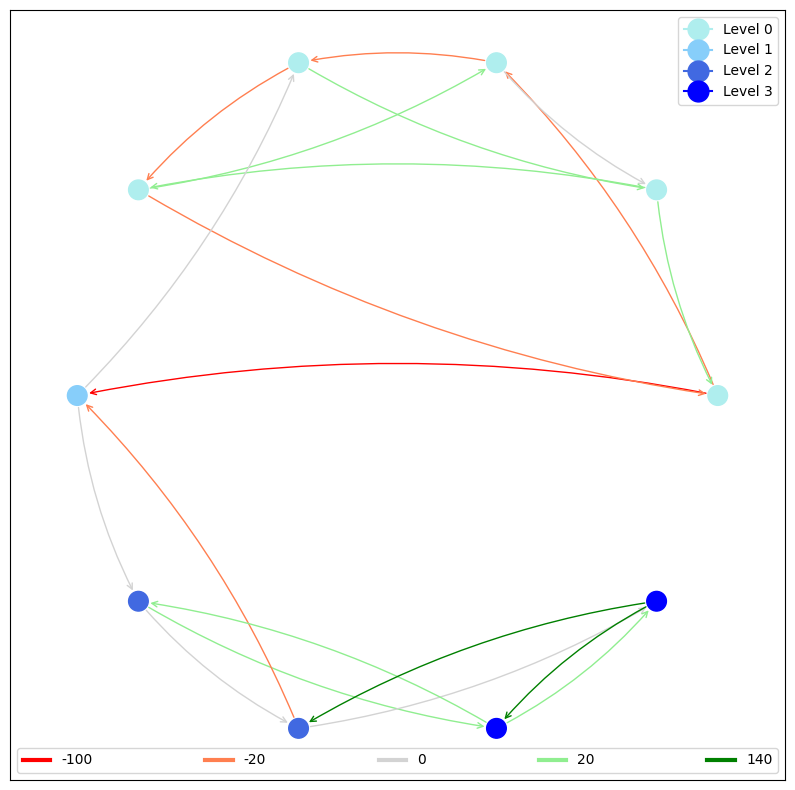

In [79]:
plot_network(test[0],'circular')

## Spring layout

node 0
node 1
node 2
node 3
node 4
node 5
node 6
node 7
node 8
node 9
{0: array([0.38470365, 0.03383277]), 1: array([0.38670187, 0.31160932]), 2: array([0.74305465, 0.39434751]), 3: array([0.72421565, 0.08586559]), 4: array([0.62561776, 0.23338884]), 5: array([ 0.00895101, -0.17490184]), 6: array([-0.7111466, -0.3554571]), 7: array([-0.39061869, -0.14085495]), 8: array([-1.        , -0.28770776]), 9: array([-0.77147931, -0.1001224 ])}
(0, 2, {'reward': -20, 'color': 'coral'})
(0, 5, {'reward': -100, 'color': 'red'})
(1, 4, {'reward': 20, 'color': 'lightgreen'})
(1, 0, {'reward': 20, 'color': 'lightgreen'})
(2, 3, {'reward': -20, 'color': 'coral'})
(2, 1, {'reward': 0, 'color': 'lightgrey'})
(3, 1, {'reward': 20, 'color': 'lightgreen'})
(3, 4, {'reward': -20, 'color': 'coral'})
(4, 0, {'reward': -20, 'color': 'coral'})
(4, 2, {'reward': 20, 'color': 'lightgreen'})
(5, 6, {'reward': 0, 'color': 'lightgrey'})
(5, 3, {'reward': 0, 'color': 'lightgrey'})
(6, 7, {'reward': 0, 'color': 'light

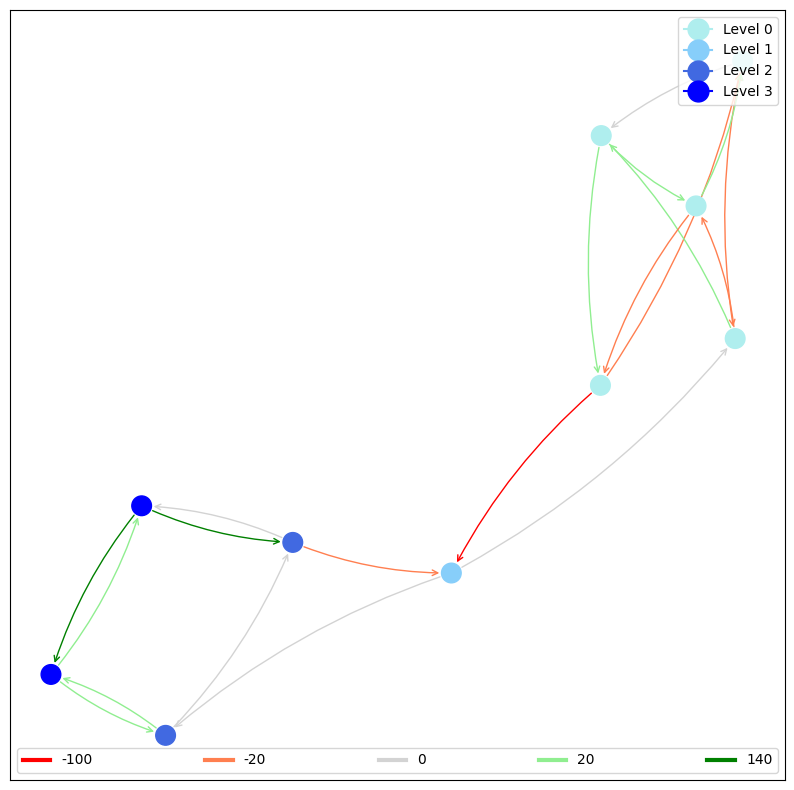

In [80]:
plot_network(train[0],'spring')

## Multipartite

node 0
node 1
node 2
node 3
node 4
node 5
node 6
node 7
node 8
node 9
{0: array([-0.55, -1.  ]), 1: array([-0.55, -0.5 ]), 2: array([-0.55,  0.  ]), 3: array([-0.55,  0.5 ]), 4: array([-0.55,  1.  ]), 5: array([-0.05,  0.  ]), 6: array([ 0.45, -0.25]), 7: array([0.45, 0.25]), 8: array([ 0.95, -0.25]), 9: array([0.95, 0.25])}
(0, 2, {'reward': -20, 'color': 'coral'})
(0, 5, {'reward': -100, 'color': 'red'})
(1, 4, {'reward': 20, 'color': 'lightgreen'})
(1, 0, {'reward': 20, 'color': 'lightgreen'})
(2, 3, {'reward': -20, 'color': 'coral'})
(2, 1, {'reward': 0, 'color': 'lightgrey'})
(3, 1, {'reward': 20, 'color': 'lightgreen'})
(3, 4, {'reward': -20, 'color': 'coral'})
(4, 0, {'reward': -20, 'color': 'coral'})
(4, 2, {'reward': 20, 'color': 'lightgreen'})
(5, 6, {'reward': 0, 'color': 'lightgrey'})
(5, 3, {'reward': 0, 'color': 'lightgrey'})
(6, 7, {'reward': 0, 'color': 'lightgrey'})
(6, 8, {'reward': 20, 'color': 'lightgreen'})
(7, 9, {'reward': 0, 'color': 'lightgrey'})
(7, 5, {'rewar

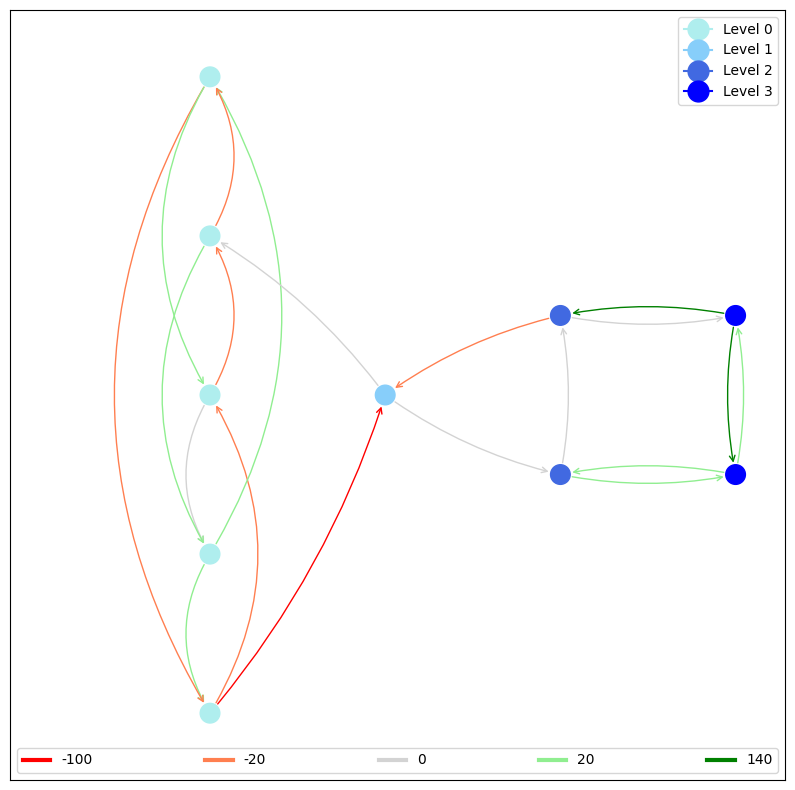

In [86]:
plot_network(train[0],'multipartite')